In [1]:
%matplotlib notebook


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [9, 6]

In [3]:
# Obtener el json (solo los datos del sensor 4)
sensor_df = pd.read_json('test-arduino-19-oct.json')

sensordf2 = sensor_df.drop(columns=['nameSensors', 'sensor1', 'sensor2', 'sensor3', 'sensor5'])
sensordf2.dropna(subset = ["sensor4"], inplace=True)

In [4]:
sensordf2

,sensor4
1970-01-01T00:01:12Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:14:50Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:06Z,"{'humidity': 60, 'light': 91.79688, 'temperatu..."
2020-10-14T02:15:20Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:31Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
...,...
2020-10-19T19:54:10Z,"{'humidity': 56, 'light': 84.17969, 'temperatu..."
2020-10-19T19:54:21Z,"{'humidity': 56, 'light': 83.39844, 'temperatu..."
2020-10-19T19:54:32Z,"{'humidity': 55, 'light': 83.49609, 'temperatu..."
2020-10-19T19:54:44Z,"{'humidity': 55, 'light': 83.49609, 'temperatu..."


In [5]:
data = sensordf2['sensor4'].values.tolist()
df = pd.DataFrame(data,columns =['humidity', 'light','temperature', 'timestamp'])

In [6]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s', errors='coerce')
df

,humidity,light,temperature,timestamp,date
0,60.0,91.69922,19.9,72,1970-01-01 00:01:12
1,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
2,60.0,91.79688,19.9,1.60264e+09,2020-10-14 02:20:00
3,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
4,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
...,...,...,...,...,...
1072,56.0,84.17969,20.0,1603137250,2020-10-19 19:54:10
1073,56.0,83.39844,20.1,1603137261,2020-10-19 19:54:21
1074,55.0,83.49609,20.2,1603137272,2020-10-19 19:54:32
1075,55.0,83.49609,20.2,1603137284,2020-10-19 19:54:44


<IPython.core.display.Javascript object>


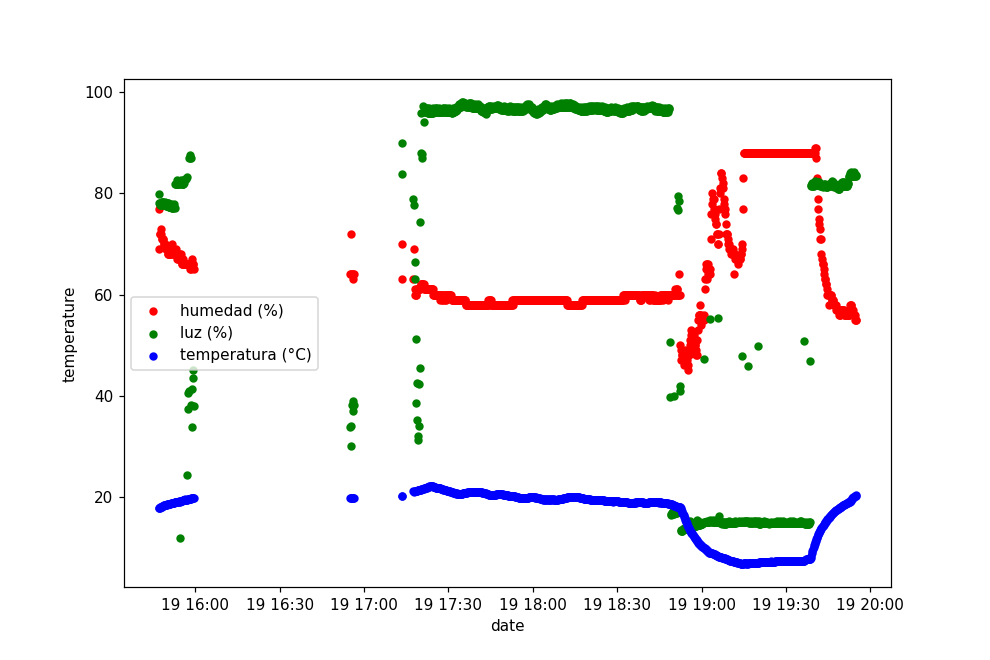

In [7]:
# Graficar

df2 = df[df['date'] > '2020-10-19 00:00:00']
#df2.plot(x ='date', y='temperature', kind = 'scatter')


ax1 = df2.plot(kind='scatter', x='date', y='humidity', color='r', label="humedad (%)")    
ax2 = df2.plot(kind='scatter', x='date', y='light', color='g', ax=ax1, label="luz (%)")    
ax3 = df2.plot(kind='scatter', x='date', y='temperature', color='b', ax=ax1, label="temperatura (°C)")

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

In [8]:
# Hora cuando se saca del refri
# 19:38:37 sensor4
# sensor5 es el del arduino
# Utilizando dht11 para temperatura y humedad - para luz sensor ldr con salida digital

<IPython.core.display.Javascript object>


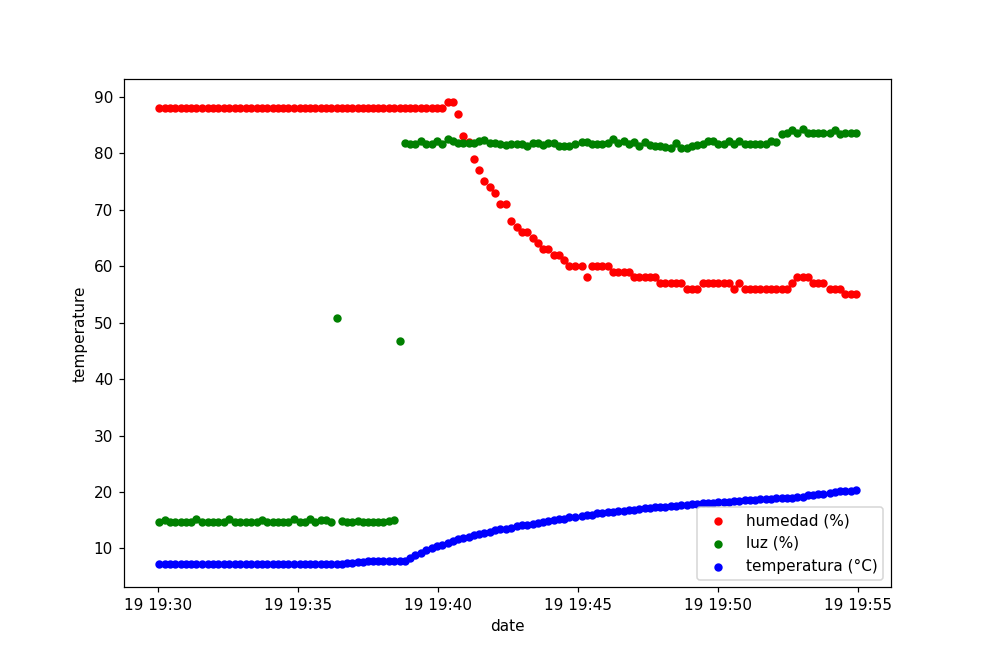

In [9]:
# Graficar

df3 = df[df['date'] > '2020-10-19 19:30:00']
#df2.plot(x ='date', y='temperature', kind = 'scatter')


ax1 = df3.plot(kind='scatter', x='date', y='humidity', color='r', label="humedad (%)")    
ax2 = df3.plot(kind='scatter', x='date', y='light', color='g', ax=ax1, label="luz (%)")    
ax3 = df3.plot(kind='scatter', x='date', y='temperature', color='b', ax=ax1, label="temperatura (°C)")

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

- El tiempo de respuesta del sensor de luz es instantaneo, ahora se revisara el tiempo exacto del sensor de temperatura y humedad

In [10]:
df3

,humidity,light,temperature,timestamp,date
945,88.0,14.74609,7.2,1603135801,2020-10-19 19:30:01
946,88.0,15.03906,7.2,1603135814,2020-10-19 19:30:14
947,88.0,14.74609,7.2,1603135825,2020-10-19 19:30:25
948,88.0,14.74609,7.2,1603135836,2020-10-19 19:30:36
949,88.0,14.74609,7.2,1603135849,2020-10-19 19:30:49
...,...,...,...,...,...
1072,56.0,84.17969,20.0,1603137250,2020-10-19 19:54:10
1073,56.0,83.39844,20.1,1603137261,2020-10-19 19:54:21
1074,55.0,83.49609,20.2,1603137272,2020-10-19 19:54:32
1075,55.0,83.49609,20.2,1603137284,2020-10-19 19:54:44


- La temperatura inicial al interior del refrigerador (medida con termometro) era de 7.2 °C, la humedad es de 88%.

- La temperatura del ambiente es de 20 °C y la humedad ambiental es del 55%.

- En la grafica se ve que el sensor de humedad actua de forma mas tardia al cambio que el de temperatura

In [13]:
df3[20:90]

,humidity,light,temperature,timestamp,date
965,88.0,14.74609,7.2,1603136034,2020-10-19 19:33:54
966,88.0,14.74609,7.2,1603136045,2020-10-19 19:34:05
967,88.0,14.74609,7.2,1603136056,2020-10-19 19:34:16
968,88.0,14.74609,7.2,1603136068,2020-10-19 19:34:28
969,88.0,14.74609,7.3,1603136079,2020-10-19 19:34:39
...,...,...,...,...,...
1030,59.0,82.42188,16.5,1603136775,2020-10-19 19:46:15
1031,59.0,81.73828,16.6,1603136786,2020-10-19 19:46:26
1032,59.0,82.22656,16.7,1603136797,2020-10-19 19:46:37
1033,59.0,81.54297,16.8,1603136808,2020-10-19 19:46:48


- Comienza a subir la temperatura 2020-10-19 19:34:39
- Comienza a bajar la humedad 2020-10-19 19:40:21
- La temperatura llega a ambiente 2020-10-19 19:54:10
- La humedad llega a ambiente 	2020-10-19 19:47:00



- Por lo tanto la humedad demora 7 mins (desde que comienza a variar, pero son 13 mins en total).
- La temperatura demora 20 mins, pero comienza a bajar apenas cambian las condiciones